In [1]:
IALAB_USER = "mrearle"

In [2]:
import sys
metadata_parser_path = f'/home/{IALAB_USER}/repos/360-visualization/metadata_parser'

if metadata_parser_path not in sys.path:
    sys.path.append(metadata_parser_path)

In [3]:
import json
import sys
import os
import time
import numpy as np
import skimage.transform
import networkx as nx
import cv2

import matplotlib.pyplot as plt

from parse_house_segmentations import HouseSegmentationFile

In [4]:
def load_image(scanId, viewpointId):
    HEIGHT = 1024
    WIDTH = 1024
    pano_img = np.zeros((HEIGHT, WIDTH*4, 3), np.uint8)
    abs_path = f"/home/{IALAB_USER}/datasets/Matterport3DSimulator/data/v1/scans"

    for i in range(4):
        image_path = viewpointId + f"_skybox{i + 1}_sami.jpg"
        rel_path = f"{abs_path}/{scanId}/matterport_skybox_images/{image_path}"
        im = cv2.imread(rel_path)  
        pano_img[:, WIDTH*i:WIDTH*(i+1), :] = im[..., ::-1]
    return pano_img

In [5]:
scanId = '17DRP5sb8fy'
viewpointId = '00ebbf3782c64d74aaf7dd39cd561175'

img = load_image(scanId, viewpointId)

In [6]:
base_path = '/home/{IALAB_USER}/datasets/Matterport3DSimulator/houses/v1/scans'
HouseSegmentationFile.base_path = base_path

In [7]:
metadata = HouseSegmentationFile.load_mapping(scanId)


In [8]:
objects = metadata.angle_relative_viewpoint_objects(viewpointId)
region = metadata.get_region(viewpointId)

scanId: 17DRP5sb8fy, viewpointId: 00ebbf3782c64d74aaf7dd39cd561175
[0.08678, -0.48654, -0.50551] -- (2.965, -0.797) -- wall
[0.13652, -0.49425, 0.46348] -- (2.872, 0.735) -- ceiling
[-0.03813, -0.46641, -1.43013] -- (-3.060, -1.255) -- floor
[1.10277, -0.02936, -0.06711] -- (1.597, -0.061) -- mirror
[-0.71965, -0.32658, -0.53937] -- (-1.997, -0.599) -- door
[0.83295, -0.01793, -1.07642] -- (1.592, -0.912) -- bath#cabinet
[0.72946, -1.14751, -1.16000] -- (2.575, -0.706) -- toilet
[0.85119, -0.04501, -0.76957] -- (1.624, -0.734) -- sink
[0.19245, -1.45366, -1.12293] -- (3.010, -0.654) -- toilet#paper
[1.04861, -1.26167, -0.69484] -- (2.448, -0.401) -- toilet#paper
[0.81154, -1.24833, 0.53000] -- (2.565, 0.342) -- light
[0.82965, -0.01633, -0.91984] -- (1.590, -0.837) -- counter
[0.93540, -0.77623, -1.39842] -- (2.263, -0.855) -- trash#can
[0.31014, 0.50217, -0.50703] -- (0.553, -0.710) -- towel
[0.91902, -0.43846, -0.75917] -- (2.016, -0.641) -- towel
[0.92854, -0.26648, -0.96652] -- (1.

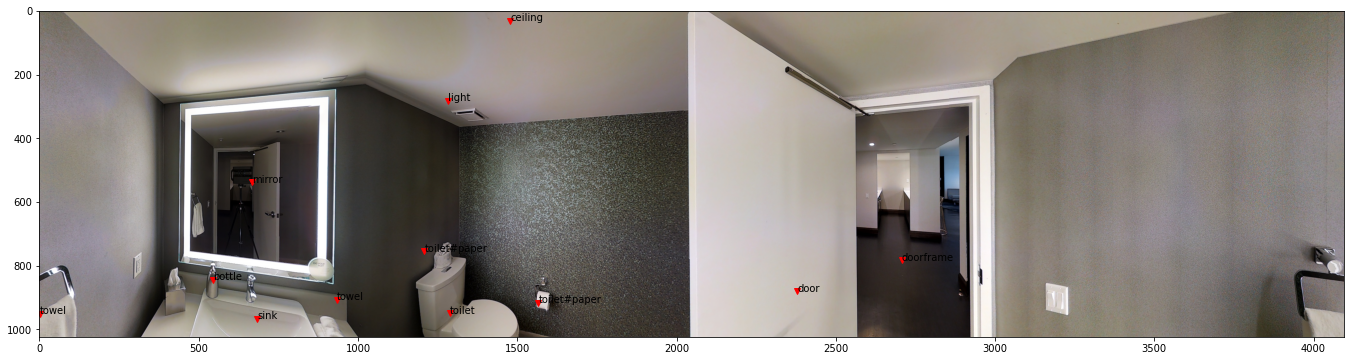

In [11]:
plt.figure(figsize=(40, 6))
plt.imshow(img)

print(f"scanId: {scanId}, viewpointId: {viewpointId}")
for i, tup in enumerate(objects.itertuples()):
    x, y, z = float(tup.px), float(tup.py), float(tup.pz)
    heading, elevation, dist = float(tup.heading), float(tup.elevation), float(tup.distance)
    category = tup.category_mapping_name
    print(f'[{x:.5f}, {y:.5f}, {z:.5f}] -- ({heading:.3f}, {elevation:.3f}) -- {category}')
        
    heading += np.pi
    while heading > np.pi:
        heading -= 2 * np.pi

    first_cord = 2000 * (1 +  heading / np.pi) - 350
    if first_cord < 0:
        first_cord += 4000
    second_cord = 1000 - 500 * (1 + elevation / (np.pi / 4))     
    if second_cord > 1000:
        continue
    plt.plot(first_cord, second_cord, color="red", marker="v", linewidth=3)
    plt.annotate(category, (first_cord, second_cord))

plt.show()

In [10]:
objects

,object_index,region_index,category_index,px,py,pz,a0x,a0y,a0z,a1x,a1y,a1z,r0,r1,r2,category_mapping_name,distance,heading,elevation
0,64,3,0,0.08678,-0.486544,-0.505510,1,0,0,-0,0,1,1.2787,1.07518,1.07237,wall,0.494222,2.965089,-0.796688
1,65,3,2,0.13652,-0.494245,0.463480,1,0,0,0,1,0,1.22366,1.06192,0.109429,ceiling,0.512753,2.872093,0.734968
2,66,3,3,-0.03813,-0.466407,-1.430133,1,0,0,0,1,0,1.14534,1.0373,0.15117,floor,0.467963,-3.060021,-1.254561
3,67,3,19,1.10277,-0.029361,-0.067110,0,0,1,0,1,-0,0.56005,0.477925,0.0737991,mirror,1.103161,1.597415,-0.060759
4,68,3,1,-0.71965,-0.326582,-0.539370,0,0,1,-0.92388,0.382683,0,1.02612,0.436492,0.113585,door,0.790286,-1.996811,-0.598884
5,69,3,56,0.83295,-0.017931,-1.076415,0,1,0,1,-0,0,0.586162,0.286318,0.261187,bath#cabinet,0.833143,1.592320,-0.912113
6,70,3,27,0.72946,-1.147509,-1.159996,0,0,1,1,0,0,0.411579,0.387474,0.288002,toilet,1.359739,2.575343,-0.706292
7,71,3,21,0.85119,-0.045005,-0.769574,0,1,0,1,-0,0,0.326141,0.24148,0.0993583,sink,0.852379,1.623620,-0.734390
8,72,3,64,0.19245,-1.453659,-1.122929,0,0,1,1,0,0,0.0738123,0.0711428,0.0702838,toilet#paper,1.466343,3.009968,-0.653538
9,80,3,64,1.04861,-1.261669,-0.694842,0,1,0,0,0,1,0.10476,0.0944994,0.0678604,toilet#paper,1.640546,2.448157,-0.400636
